# Overview

# Business Understanding

# Data Understanding

### Data source
The data used for this project was sourced from a dataset called ‘King County House Sales’ and contains information regarding housing sales statistics in King County, WA.

##### The dataset contains the following columns:

* ```id```: A unique sale id relating to a house sale
* ```date```: Date of house sale
* ```price```: The price which the house sold for
* ```bedrooms```: How many bedrooms the house has
* ```bathrooms```: How many bathrooms the house has
* ```sqft_living```: How much square footage the house has
* ```sqft_lot```: How much square footage the lot has
* ```floors```: How many floors the house has
* ```waterfront```: Whether the house is on the waterfront. Originally contained ‘YES’ or ‘NO’, converted to 0 or 1 for comparative purposes
* ```view```: Whether the house has a view and whether it’s fair, average, good, or excellent. Converted to numberical (0-4) for comparative purposes
* ```condition```: overall condition of the house: Poor, Fair, Average, Good, Very Good
* ```Grade```: Numerical grading for house
* ```sqft_above```: How much of the houses square footage is above ground
* ```sqft_basement```: How much of the square footage is in the basement
* ```yr_built```: Year the house was built
* ```yr_renovated```: Year the house was renovated, if applicable
* ```zipcode```: House zipcode
* ```lat```: House’s latitude coordinate
* ```long```: House’s longitude coordinate
* ```sqft_living15```: Average size of living space for the closest 15 houses
* ```sqft_lot15```: Average size of lot for the closest 15 houses

# Data Cleaning

### Importing required modules

In [53]:
# Data manipulations
import pickle
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
from itertools import combinations
from statsmodels.formula.api import ols


#SKlearn
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing data

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

### Processing cleaning

In [3]:
# Explore our data
display(df.head())
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Lets convert condition codes to numerical values for the prediction model
# Create function for conditional labeling:
def condition_coding (condition):
    """
    This will take the condition from string format and transform it into a corresponding code in integer format
    Poor = 1, Fair = 2, Average = 3, Good = 4, Very Good = 5
    """
    if condition == 'Poor':
        condition_code = 1
    elif condition == 'Fair':
        condition_code = 2
    elif condition == 'Average':
        condition_code = 3
    elif condition == 'Good':
        condition_code = 4
    elif condition == 'Very Good':
        condition_code = 5
    return condition_code

# Apply function to dataframe
df["condition_code"] = df['condition'].map(condition_coding)


In [5]:
# Lets convert grade codes to numerical values for the prediction model
# Create function for conditional labeling:
def grade_coding (grade):
    """
    This takes the grade in string format, splits it into a list of characters
    It then concatenates the first two characters from the list and strips the whitespace and turns the result into an integer
    We are left with a one or two digit integer correspondinng to the grade of the property
    """
    grade_list = list(grade)
    grade_code = int((grade_list[0] + grade_list[1]).strip())
    return grade_code

df['grade_code'] = df['grade'].map(grade_coding)

In [6]:
# Resolve missing values of house renovation dates. The column mode is 0, we fill missing values with it.
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [7]:
# Create house age feature.
# House age feature calculated the timeframe between transaction date and house construction date.
df['age'] = df['date'].map(lambda x: int(x[-4:])) - df['yr_built']
df.loc[df['age'] < 0, 'age'] = 0

In [8]:
# Feature was house renovated or not. 
def renovated (year):
    """
    This returns a True / False value on whether a property has been renovated or not
    """
    if year == 0.0:
        return 0
    elif year > 0.0:
        return 1
    else:
        return 0
    
df['renovated'] = df['yr_renovated'].map(renovated)

In [9]:
# The majority of values in waterfront column are - No. Fill the missing values with mode value if this column.
df['waterfront'] = df['waterfront'].fillna('NO')

# Convert waterfront column to numerical values for the prediction model 
df['waterfront_coded'] = df['waterfront'].map({'NO':0, 'YES':1})


In [10]:
# The majority of values in view column are - None. Fill the missing values with mode value if this column.
df['view'] = df['view'].fillna('NONE')

# Label view column for the prediction model.
df['view_coded'] = df['view'].map({'NONE':0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4})


In [11]:
# Some values of sqft_basementa are missing. Find the missing values by subtracting sqft_above from sqft living.
df['sqft_basement'] = np.where(df['sqft_basement'] == '?', df['sqft_living'] - df['sqft_above'], df['sqft_basement'])
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [12]:
# Check the shape of finall dataframe without geo location data
df.shape

(21597, 27)

In [13]:
# location coordinates were scrapped from OSM in other jupyter notebook. 
# Load processed geo data from another notebook
with open('./data/Data_frame_geoloc.pickle', 'rb') as df_geo_data:
    df_geo = pickle.load(df_geo_data)


In [14]:
# Lets check size of dataframe, drop all dublicated columns.
df_geo.shape
df_geo.drop(['id', 'lat', 'price', 'yr_built', 'sqft_living', 'sqft_lot'], axis = 1 , inplace = True)


In [15]:
df_geo.shape

(21597, 8)

In [16]:
# Merge 2 dataframes and check all columns.
df = pd.concat([df,df_geo], axis =1, verify_integrity = True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21597 non-null  int64  
 1   date              21597 non-null  object 
 2   price             21597 non-null  float64
 3   bedrooms          21597 non-null  int64  
 4   bathrooms         21597 non-null  float64
 5   sqft_living       21597 non-null  int64  
 6   sqft_lot          21597 non-null  int64  
 7   floors            21597 non-null  float64
 8   waterfront        21597 non-null  object 
 9   view              21597 non-null  object 
 10  condition         21597 non-null  object 
 11  grade             21597 non-null  object 
 12  sqft_above        21597 non-null  int64  
 13  sqft_basement     21597 non-null  float64
 14  yr_built          21597 non-null  int64  
 15  yr_renovated      21597 non-null  float64
 16  zipcode           21597 non-null  int64 

In [17]:
# Investigate states and counties for noise.
print(df["state"].value_counts()) #all recods from Washington state
print(df["county"].value_counts()) # 4 records from different counties. 


Washington    21597
Name: state, dtype: int64
King County         21593
Pierce County           2
Snohomish County        2
Name: county, dtype: int64


In [18]:
#Remove records from other counties
df.drop(df[df.county != "King County"].index, inplace = True)
df.shape
#Drop county and state columns to reduce the number of features
df.drop("state", axis = 1, inplace = True)
df.drop("county", axis = 1, inplace = True)


In [19]:
df.shape

(21593, 33)

In [20]:
# Investigate "city" column for missing values
print(f"The number of records with missing cities {sum(df.city.isna())}") #779 records have no cities in it. 
print(f"Missing values are in {round(sum(df.city.isna())/df.shape[0]*100,2)} % of data")

The number of records with missing cities 779
Missing values are in 3.61 % of data


In [21]:
#Remove records with missing cities
df.drop(df[df.city.isna() == True].index, axis = 0, inplace = True)
df.shape

(20814, 33)

In [22]:
# Investigate "Type_place" column for missing values
print(f"The number of records with missing values {sum(df.Type_place.isna())}")

The number of records with missing values 0


In [23]:
# Investigate "suburb" column for missing values
print(f"The number of records with missing values {sum(df.suburb.isna())}")
print(f"Missing \"suburb\"values are in {round(sum(df.suburb.isna())/df.shape[0]*100,2)} % of data")
df_geo.suburb.value_counts() #There is no strong patterns in this data
print("Missing \"suburb\" values for cities are in ", round(sum(df[df.Type_place == "city"].suburb.value_counts())/df[df.Type_place == "city"].shape[0]*100,2), "% of records")
# We won't proceed with this data


The number of records with missing values 11942
Missing "suburb"values are in 57.37 % of data
Missing "suburb" values for cities are in  70.54 % of records


In [24]:
# Remove outliers in bedrooms
df.drop(df[(df.bedrooms == 33)].index, axis = 0, inplace = True)
df.drop(df[(df.bedrooms == 11)].index, axis = 0, inplace = True)
df.drop(df[(df.bedrooms == 10)].index, axis = 0, inplace = True)


(20814, 33)
(20809, 33)


In [25]:
# Drop all cathegorical values that were coverted to numerical
to_drop_cat = ["date", "waterfront", "view", "condition", "grade"]
df.drop(to_drop_cat, axis = 1, inplace = True)

(20809, 33)
(20809, 28)


In [26]:
#reset indexes
df_fin = df.reset_index().drop("index", axis = 1)

In [27]:
# Different type of geo columns
Geo_columns_basic_all = ["Type_place", "city"]
Geo_columns_basic_type = ["Type_place"]
Geo_columns_basic_city_names = ["city"]
Geo_columns_advanced = ["suburb"]
Geo_columns_drop = ["To_drop_place_ID", "To_drop_road"]

In [28]:
# Setup the type of geo columns that will be used for modelling
# Model one : encode each city into our dataframe
modeling_columns = Geo_columns_basic_city_names
Geo_columns_drop = [column for column in list(df_fin.columns) if ((column not in modeling_columns)  and (column != "id"))]

#seting up data categorical data for encoding !!!!!! (need to change later on)
X_cat_geo = df_fin.drop(Geo_columns_drop, axis = 1)


In [29]:
# setup One Hot Encoder 
encoder_geo_basic = OneHotEncoder(handle_unknown = "ignore")
fit_df = X_cat_geo.drop("id", axis = 1)
encoder_geo_basic.fit(fit_df)

OneHotEncoder(handle_unknown='ignore')

In [30]:
# Prepare transformed dataset
X_cat_transf=encoder_geo_basic.transform(fit_df)
X_geo_df = pd.DataFrame(X_cat_transf.todense(), columns = encoder_geo_basic.get_feature_names())
#X_geo_df["id"] = X_cat_geo["id"]
df_cities_columns = encoder_geo_basic.get_feature_names() # New added column names. If you need them later on.
df_cities = pd.concat([df_fin, X_geo_df], axis = 1)       # DF with coded cities/towns/villages


In [31]:
# Setup the type of geo columns that will be used for modelling
# Model two : encode only size of city into model
modeling_columns = Geo_columns_basic_type
Geo_columns_drop = [column for column in list(df_fin.columns) if ((column not in modeling_columns)  and (column != "id"))]

#seting up data categorical data for encoding !!!!!! (need to change later on)
X_cat_geo = df_fin.drop(Geo_columns_drop, axis = 1)


In [32]:
# setup One Hot Encoder 
encoder_geo_basic = OneHotEncoder(handle_unknown = "ignore")
fit_df = X_cat_geo.drop("id", axis = 1)
encoder_geo_basic.fit(fit_df)

OneHotEncoder(handle_unknown='ignore')

In [33]:
# Prepare transformed dataset
X_cat_transf=encoder_geo_basic.transform(fit_df)
X_geo_df = pd.DataFrame(X_cat_transf.todense(), columns = encoder_geo_basic.get_feature_names())
#X_geo_df["id"] = X_cat_geo["id"]
df_types_columns = encoder_geo_basic.get_feature_names() # New added column names. If you need them later on.
df_types = pd.concat([df_fin, X_geo_df], axis = 1)       # DF with coded cities/towns/villages
df_types

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,...,view_coded,lon,To_drop_place_ID,To_drop_road,Type_place,city,suburb,x0_city,x0_town,x0_village
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,...,0,-122.257,159583259.0,61st Avenue South,city,Seattle,NaN,1.0,0.0,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,...,0,-122.319,159668720.0,Northeast 127th Street,city,Seattle,Northgate,1.0,0.0,0.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,...,0,-122.233,74808506.0,81st Avenue Northeast,town,Kenmore,Moorlands,0.0,1.0,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,...,0,-122.393,156392831.0,Fauntleroy Way Southwest,city,Seattle,Fauntleroy,1.0,0.0,0.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,...,0,-122.045,293729110.0,221st Avenue Northeast,town,Sammamish,NaN,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20804,263000018,360000.0,3,2.50,1530,1131,3.0,1530,0.0,2009,...,0,-122.346,20331941.0,North 97th Street,city,Seattle,Greenwood,1.0,0.0,0.0
20805,6600060120,400000.0,4,2.50,2310,5813,2.0,2310,0.0,2014,...,0,-122.362,231509570.0,Southwest 103rd Place,city,Seattle,White Center,1.0,0.0,0.0
20806,1523300141,402101.0,2,0.75,1020,1350,2.0,1020,0.0,2009,...,0,-122.299,157689516.0,26th Avenue South,city,Seattle,Leschi,1.0,0.0,0.0
20807,291310100,400000.0,3,2.50,1600,2388,2.0,1600,0.0,2004,...,0,-122.069,293824524.0,Northwest Boulder Way Drive,town,Issaquah,NaN,0.0,1.0,0.0


In [34]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20809 entries, 0 to 20808
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          20809 non-null  int64  
 1   price                       20809 non-null  float64
 2   bedrooms                    20809 non-null  int64  
 3   bathrooms                   20809 non-null  float64
 4   sqft_living                 20809 non-null  int64  
 5   sqft_lot                    20809 non-null  int64  
 6   floors                      20809 non-null  float64
 7   sqft_above                  20809 non-null  int64  
 8   sqft_basement               20809 non-null  float64
 9   yr_built                    20809 non-null  int64  
 10  yr_renovated                20809 non-null  float64
 11  zipcode                     20809 non-null  int64  
 12  lat                         20809 non-null  float64
 13  long                        208

In [35]:
# Drob geo cathegorical columns that were transfered to numerical.
to_drop_index = [(number) for number, column in enumerate(df_cities.dtypes) if column == 'O']
to_drop_columns = list(df_cities.columns[to_drop_index])
df_cities = df_cities.drop(to_drop_columns, axis =1)

to_drop_index = [(number) for number, column in enumerate(df_types.dtypes) if column == 'O']
to_drop_columns = list(df_types.columns[to_drop_index])
df_types = df_types.drop(to_drop_columns, axis =1)



In [36]:
# Check columns left
df_cities.info()
df_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20809 entries, 0 to 20808
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          20809 non-null  int64  
 1   price                       20809 non-null  float64
 2   bedrooms                    20809 non-null  int64  
 3   bathrooms                   20809 non-null  float64
 4   sqft_living                 20809 non-null  int64  
 5   sqft_lot                    20809 non-null  int64  
 6   floors                      20809 non-null  float64
 7   sqft_above                  20809 non-null  int64  
 8   sqft_basement               20809 non-null  float64
 9   yr_built                    20809 non-null  int64  
 10  yr_renovated                20809 non-null  float64
 11  zipcode                     20809 non-null  int64  
 12  lat                         20809 non-null  float64
 13  long                        208

In [37]:
#Final clean_up
final_drop = ["zipcode", "id", "zipcode", "lat", "long", "lon","To_drop_place_ID"]
df_cities = df_cities.drop(final_drop, axis = 1)
df_types = df_types.drop(final_drop, axis = 1)

In [38]:
# Output from data cleaning: 2 dataframes, cleaned from noise and with corrected data.
# df_cities - dataframe with encoded cities where property is located
# df_types - dataframe with encoded type of location (city, town or village)

df_cities
df_types
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20809 entries, 0 to 20808
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       20809 non-null  float64
 1   bedrooms                    20809 non-null  int64  
 2   bathrooms                   20809 non-null  float64
 3   sqft_living                 20809 non-null  int64  
 4   sqft_lot                    20809 non-null  int64  
 5   floors                      20809 non-null  float64
 6   sqft_above                  20809 non-null  int64  
 7   sqft_basement               20809 non-null  float64
 8   yr_built                    20809 non-null  int64  
 9   yr_renovated                20809 non-null  float64
 10  sqft_living15               20809 non-null  int64  
 11  sqft_lot15                  20809 non-null  int64  
 12  condition_code              20809 non-null  int64  
 13  grade_code                  208

# Data Modeling

In [39]:
# Data transformation
df_cities["bedrooms"].value_counts()


3    9440
4    6689
2    2608
5    1567
6     266
1     182
7      38
8      13
9       6
Name: bedrooms, dtype: int64

In [40]:
linreg = LinearRegression()
linreg.fit(df_cities.drop("price", axis = 1), df_cities["price"])

y_hat = linreg.predict(df_cities.drop("price", axis = 1))
print(mean_squared_error(df_cities["price"],y_hat))
print(r2_score(df_cities["price"], y_hat))


31517458660.770634
0.7696583096836827


In [125]:
def linear_reg_calculator(Data, n = 1):
    poly = PolynomialFeatures(n)
    linreg = LinearRegression()
    kf = KFold(n_splits=5)
    y = Data["price"]
    X = Data.drop("price", axis = 1)
    # Fit and transform X_train
    X_poly= poly.fit_transform(X)
    if n > 0:
        X = X_poly
    else:
        pass
    X_columns = len(X[0])
    reg_poly = cross_val_score(linreg, X, y, scoring = "r2", cv = kf)
    mean = np.mean(reg_poly)
    stand = np.std(reg_poly)
    print(f"Model accuracy {round(mean*100,1)}% with 95% conf interval +-{round(2*stand*100,1)}%")
    print(f"Polynomial - {n}, N of columns used {X_columns}")

    
# Work example
linear_reg_calculator(df_cities)

Model accuracy 75.9% with 95% conf interval +-3.8%
Polynomial - 1, N of columns used 66


In [41]:
# this method iterates through and creates a linear regression model for each Polynomial 1-5
# returns a list of the train scores, test scores and mean squared errors to find the best fit model
def poly_regression_model(X_train, y_train, X_test, y_test):
    train_scores = []
    test_scores = []
    mse = []
    for i in range(1,6):
        poly = PolynomialFeatures(i)
        X_poly = poly.fit_transform(X_train)
        model = LinearRegression()
        model.fit(X_poly, y_train)
        train_scores.append(model.score(X_poly, y_train))
        test_scores.append(model.score(poly.transform(X_test), y_test))
        
        
        predict_train = model.predict(X_poly)
        predict_test = model.predict(poly.transform(X_test))
        mse.append(mean_squared_error(y_test, predict_test))

    
    return train_scores, test_scores, mse

### Assessing for Multicollinearity within housing feature columns (sqft, bedrooms, bathrooms, floors, etc)

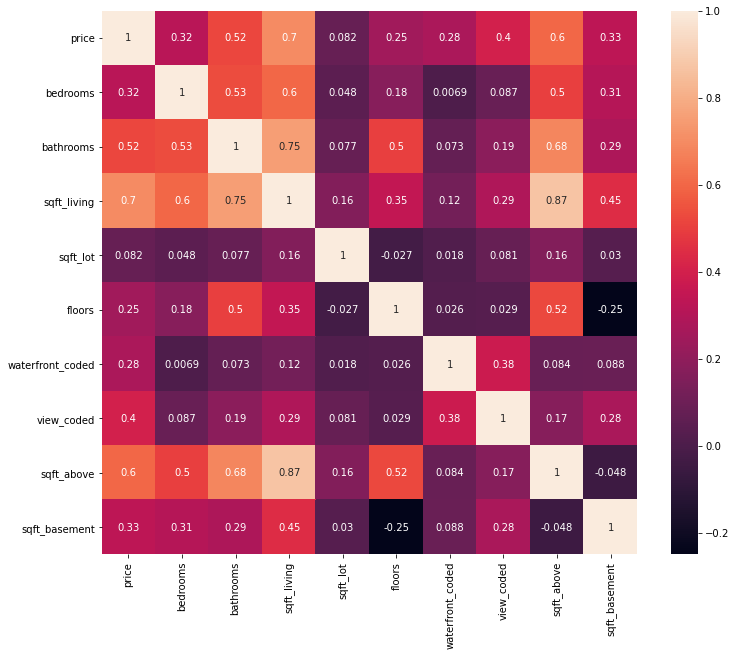

In [50]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront_coded', 'view_coded', 'sqft_above', 'sqft_basement']
corr = df_cities[cols].corr()

fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(corr, annot=True, ax=ax);


In [54]:
col_pred = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront_coded', 'view_coded', 'sqft_above', 'sqft_basement']

predictors = '+'.join(col_pred)
formula = 'price' + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     3349.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:25:45   Log-Likelihood:            -2.8771e+05
No. Observations:               20809   AIC:                         5.754e+05
Df Residuals:                   20800   BIC:                         5.755e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8.141e+04   7712.348     10.555      0.000    6.63e+04    9.65e+04
bedrooms         -5.399e+04   2424.147    -22.271      0.000   -5.87e+04   -4.92e+04
bathrooms         5668.5160   3733.233      1.518      0.129   -1648.912     1.3e+04
sqft_living        193.0541      2.314     83.435      0.000     188.519     197.589
sqft_lot            -0.4526      0.052     -8.733      0.000      -0.554      -0.351
floors            9929.1934   4199.602      2.364      0.018    1697.645    1.82e+04
waterfront_coded  6.443e+05   2.32e+04     27.792      0.000    5.99e+05     6.9e+05
view_coded        7.588e+04   2545.968     29.803      0.000    7.09e+04    8.09e+04
sqft_above          95.4948      2.298     41.555      0.000      90.990      99.999
sqft_basement       97.5594      3.149     30.977      0.000      91.386     103.733
==============================================================================
Omnibus:                    12412.368   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           396584.916
Skew:                           2.329   Prob(JB):                         0.00
Kurtosis:                      23.874   Cond. No.                     2.45e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Multicollinearity Issues**

There are potential multicollinearity issues with **sqft_above** and **sqft_living** as well as **sqft_living** and **bathrooms**

**Bathrooms** has also proved to not be statistically significant (p > 0.05)

Best option to remove **sqft_above**, **sqft_basement**, and **bathrooms** columns to avoid any potential modeling issues

**sqft_lot** and **floors** did not have a significant effect on the R^2 value for the ols model, so we have removed these column from the model as well

In [113]:
cols_features = ['bedrooms', 'sqft_living', 'waterfront_coded', 'view_coded']

In [114]:
# below is the ols model for the final selection of columns for house features
# chose these columns based on p-value and how each effected R^2 value

predictors = '+'.join(cols_features)
formula = 'price' + '~' + predictors
model = ols(formula=formula, data=df_cities).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     6643.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:05:13   Log-Likelihood:            -2.8776e+05
No. Observations:               20809   AIC:                         5.755e+05
Df Residuals:                   20804   BIC:                         5.756e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9.237e+04   6609.262     13.976      0.000    7.94e+04    1.05e+05
bedrooms         -5.247e+04   2381.399    -22.032      0.000   -5.71e+04   -4.78e+04
sqft_living        291.3484      2.453    118.761      0.000     286.540     296.157
waterfront_coded  6.483e+05   2.32e+04     27.911      0.000    6.03e+05    6.94e+05
view_coded        7.461e+04   2509.194     29.735      0.000    6.97e+04    7.95e+04
==============================================================================
Omnibus:                    12375.239   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           394928.758
Skew:                           2.319   Prob(JB):                         0.00
Kurtosis:                      23.832   Cond. No.                     3.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
# drop the feature columns from the data frame to continue with out regression modeling
drop_cols = ['sqft_lot', 'sqft_above', 'sqft_basement', 'bathrooms', 'floors']

In [128]:
df_cities = df_cities.drop(drop_cols, axis=1)

### Assessing for Multicollinearity within housing condition columns (condition, grade, age, etc)

In [130]:
linear_reg_calculator(df_cities)

Model accuracy 75.5% with 95% conf interval +-3.8%
Polynomial - 1, N of columns used 61


In [122]:
c = ['bedrooms', 'sqft_living', 'waterfront_coded', 'view_coded', 'price']

In [123]:
df_lin = df_cities[c]

In [124]:
linear_reg_calculator(df_lin)

Model accuracy 55.7% with 95% conf interval +-3.4%
Polynomial - 1, N of columns used 5


In [115]:
X = df_cities[cols_features]
y = df_cities['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [116]:
# tests best polynomial regression model for our data - 2 is going to be the best
poly_regression_model(X_train, y_train, X_test, y_test)

([0.5603618916782545,
  0.6034047223154879,
  0.6111148867816545,
  0.6153089883702128,
  0.6154758908151512],
 [0.5626827371295775,
  0.5558686634195376,
  0.5575668809496581,
  0.548764817066516,
  0.4829003961370262],
 [61907753255.45251,
  62872371004.9023,
  62631966976.16873,
  63878009712.83003,
  73201946052.4396])

In [117]:
# Create linear regression for a polynomial of 2
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)


predict_train = model.predict(X_poly)
predict_test = model.predict(poly.transform(X_test))
mse = mean_squared_error(y_test, predict_test)

train_score = model.score(X_poly, y_train)
test_score = model.score(poly.transform(X_test), y_test)

train_score, test_score, mse

(0.6034047223154879, 0.5558686634195376, 62872371004.9023)

# Regression Results

# Conclusion